In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from ggplot import *

In [5]:
data = pd.read_csv('/kaggle/input/wine-dataset-for-clustering/wine-clustering.csv')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


We visually view the distribution of data

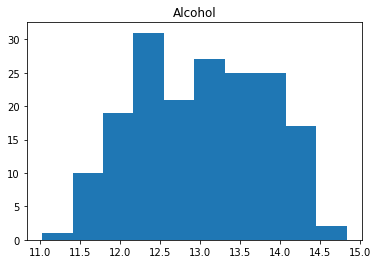

<Figure size 432x288 with 0 Axes>

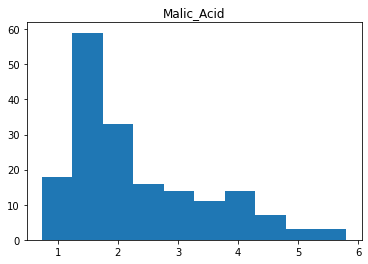

<Figure size 432x288 with 0 Axes>

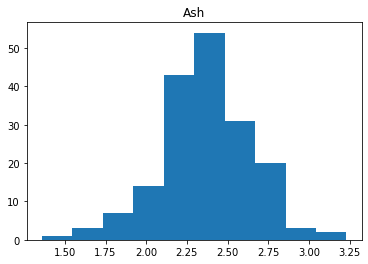

<Figure size 432x288 with 0 Axes>

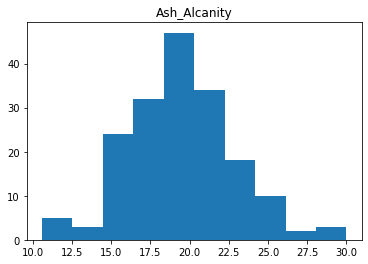

<Figure size 432x288 with 0 Axes>

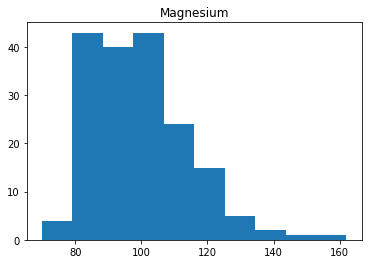

<Figure size 432x288 with 0 Axes>

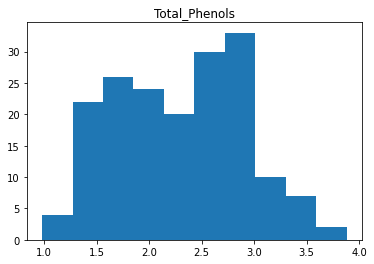

<Figure size 432x288 with 0 Axes>

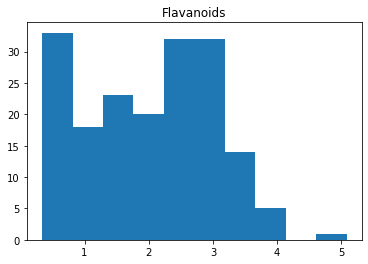

<Figure size 432x288 with 0 Axes>

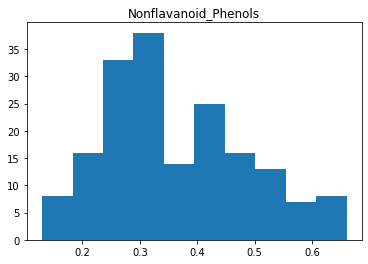

<Figure size 432x288 with 0 Axes>

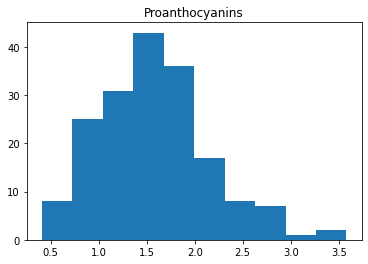

<Figure size 432x288 with 0 Axes>

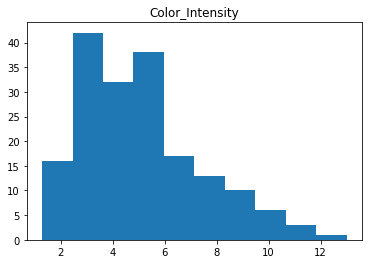

<Figure size 432x288 with 0 Axes>

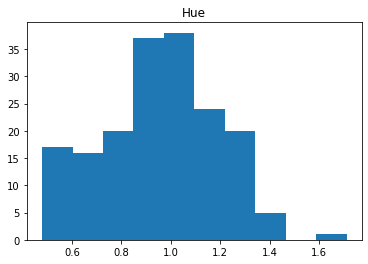

<Figure size 432x288 with 0 Axes>

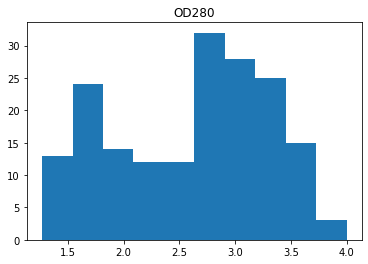

<Figure size 432x288 with 0 Axes>

In [3]:
l=data.columns
for i in range(0,12):
    plt.figure(figsize=(6.0,4.0))
    plt.title(label=l[i])
    plt.hist(sorted(data.iloc[:,i]))
    plt.show()
    plt.clf()

We check the outlier through the box chart

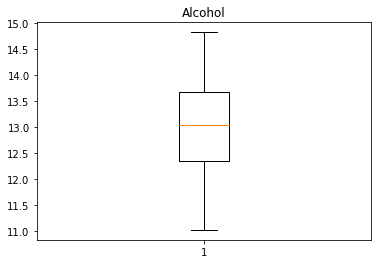

<Figure size 432x288 with 0 Axes>

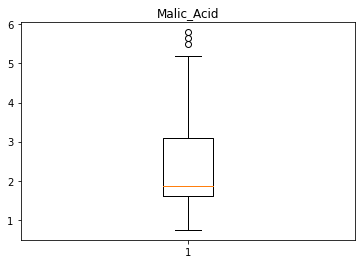

<Figure size 432x288 with 0 Axes>

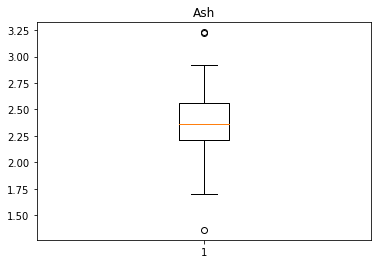

<Figure size 432x288 with 0 Axes>

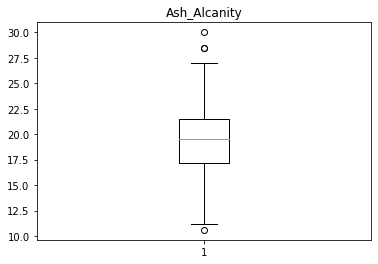

<Figure size 432x288 with 0 Axes>

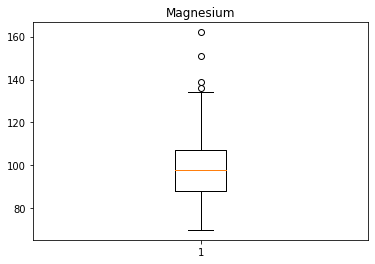

<Figure size 432x288 with 0 Axes>

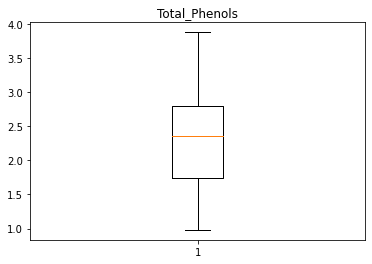

<Figure size 432x288 with 0 Axes>

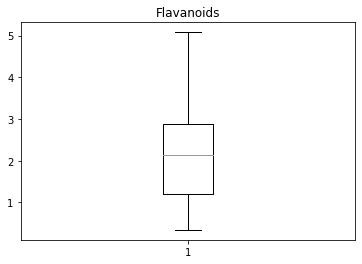

<Figure size 432x288 with 0 Axes>

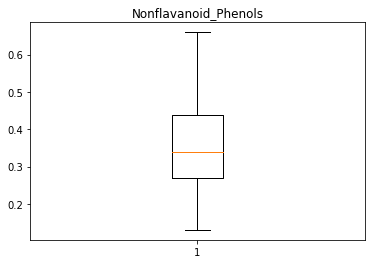

<Figure size 432x288 with 0 Axes>

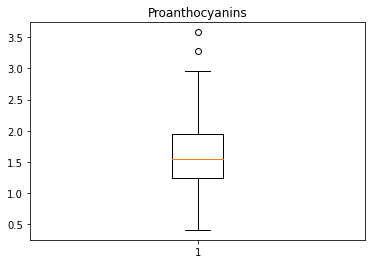

<Figure size 432x288 with 0 Axes>

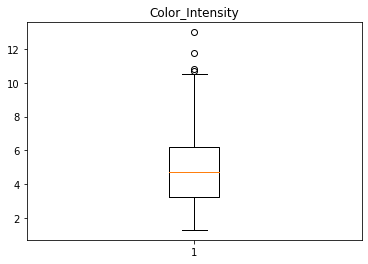

<Figure size 432x288 with 0 Axes>

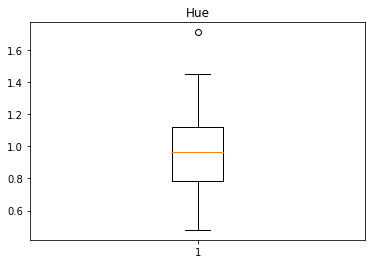

<Figure size 432x288 with 0 Axes>

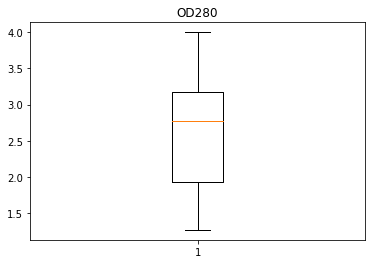

<Figure size 432x288 with 0 Axes>

In [4]:

for i in range(0,12):
    plt.figure(figsize=(6.0,4.0))
    plt.title(label=l[i])
    plt.boxplot(sorted(data.iloc[:,i]))
    plt.show()
    plt.clf()

 
# Draw a thermodynamic diagram to observe the correlation coefficient between various features

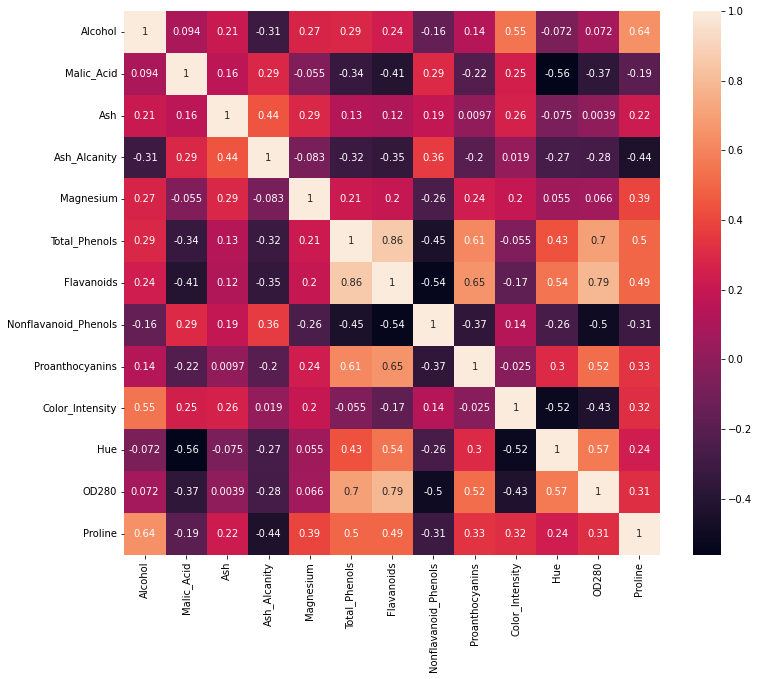

In [4]:
plt.figure(figsize=(12,10))
p=sns.heatmap(data.corr(), annot=True)
plt.show()

# Feature scaling
Standardize and normalize the data

In [5]:
# Standard（feature scaling）
sc = StandardScaler()
data_std = sc.fit_transform(data)
data_std = pd.DataFrame(data_std)
# normalize MinMax
mm = MinMaxScaler()
mm_scale = mm.fit(data_std)
data_mm = mm_scale.transform(data_std)
print("feature scaling:",pd.DataFrame(data_mm).head())

feature scaling:          0         1         2         3         4         5         6   \
0  0.842105  0.191700  0.572193  0.257732  0.619565  0.627586  0.573840   
1  0.571053  0.205534  0.417112  0.030928  0.326087  0.575862  0.510549   
2  0.560526  0.320158  0.700535  0.412371  0.336957  0.627586  0.611814   
3  0.878947  0.239130  0.609626  0.319588  0.467391  0.989655  0.664557   
4  0.581579  0.365613  0.807487  0.536082  0.521739  0.627586  0.495781   

         7         8         9         10        11        12  
0  0.283019  0.593060  0.372014  0.455285  0.970696  0.561341  
1  0.245283  0.274448  0.264505  0.463415  0.780220  0.550642  
2  0.320755  0.757098  0.375427  0.447154  0.695971  0.646933  
3  0.207547  0.558360  0.556314  0.308943  0.798535  0.857347  
4  0.490566  0.444795  0.259386  0.455285  0.608059  0.325963  


# Determine K value
The k-value was determined using a gravel plot, and the point with the highest degree of distortion is the best number of clusters. From the gravel plot, it can be seen that selecting a k-value of 3 is the best choice for this dataset

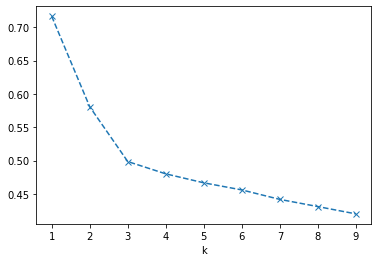

In [6]:
from scipy.spatial.distance import cdist

meandistortions = []
for k in range(1,10):
    kmeans = KMeans(n_clusters = k)
    kmeans .fit(data_mm)
    meandistortions.append(
        sum(
            np.min(cdist(data_mm,kmeans.cluster_centers_,'euclidean'),axis = 1)
        )/data_mm.shape[0]
    )
plt.plot(range(1,10),meandistortions,'x--')
plt.xlabel('k')
plt.show()

****K-means****

In [7]:

k_means = KMeans(init='k-means++',n_clusters=3,max_iter=400)
k_means.fit(data_mm)
label = k_means.fit_predict(data_mm)
print(label)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 1 1 1 1 1 1 2 1 2 1 1 0
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


# PCA

In [24]:
pca = PCA(n_components = 0.95)
pca.fit(data_mm)
data_PCA = pca.transform(data_mm)

array([[-0.70633576, -0.25319275,  0.02409269, ...,  0.13851902,
         0.11862666,  0.27744324],
       [-0.4849768 , -0.00882289, -0.28048205, ..., -0.18119338,
         0.02806622,  0.11494849],
       [-0.52117227, -0.18918722,  0.19621674, ...,  0.02317846,
        -0.2221326 , -0.01727012],
       ...,
       [ 0.62631289, -0.54685701, -0.03049476, ..., -0.03713893,
        -0.00146496,  0.07354422],
       [ 0.5729911 , -0.42551609, -0.09453672, ..., -0.02466179,
         0.01139898,  0.19659748],
       [ 0.701764  , -0.51350498,  0.29390996, ...,  0.11174192,
         0.10294569, -0.0509633 ]])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 1 2 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


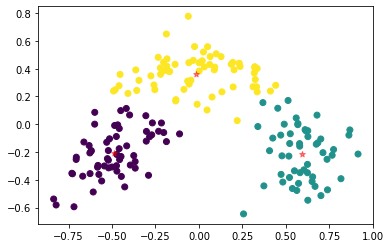

In [9]:

k_means.fit(data_PCA)
label_pca = k_means.fit_predict(data_PCA)
print(label_pca)
plt.scatter(data_PCA[:,0], data_PCA[:,1], c=label_pca)
centers_PCA = k_means.cluster_centers_
plt.scatter(centers_PCA[:,0], centers_PCA[:,1], c='red', marker='*',alpha=0.5)
plt.show()

# GaussianMixture


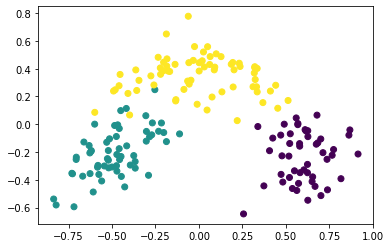

In [13]:
from sklearn.mixture import GaussianMixture
#GMM
gmm = GaussianMixture(n_components=3, covariance_type='full').fit(data_PCA)
gmm_pred = gmm.predict(data_PCA)
plt.scatter(data_PCA[:, 0], data_PCA[:, 1], c=gmm_pred)
plt.show()

# agglomerative

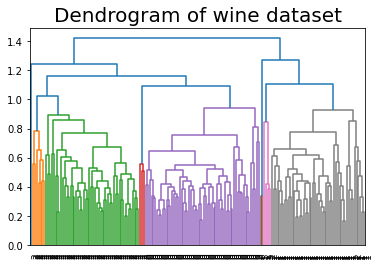

In [14]:
from scipy.cluster import hierarchy

plt.title('Dendrogram of wine dataset',fontdict={'size':20})
Z=hierarchy.linkage(y=data_PCA,method='weighted',metric='euclidean')
hierarchy.dendrogram(Z=Z,labels=label_pca,orientation='top',leaf_rotation=90,leaf_font_size=7,truncate_mode='none',p=3) 
plt.xticks(color='black',rotation=90,verticalalignment='top',horizontalalignment='left') 
plt.tick_params(axis='x',direction='out',length=4,width=2,pad=4,labelsize=9)
plt.show()